In [1]:
!pip install opendatasets -q

In [2]:
# downloading the dataset 
import opendatasets as od 

dataset_url = "https://www.kaggle.com/datasets/insiyeah/musicfeatures?sort=votes"

od.download(dataset_url)

100%|██████████| 291k/291k [00:00<00:00, 36.9MB/s]

In [3]:
# importing neccessary libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm


In [6]:
DATASET_DIR = './musicfeatures/data.csv'

# loading the dataset to pandas dataframe
df = pd.read_csv(DATASET_DIR)

# checking 5 random samples from the dataset
df.sample(5)

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
372,disco.00038.au,123.046875,59,0.370777,0.113184,3354.239799,2987.318336,7044.632402,0.168288,-77.365148,...,-1.049600,-3.763514,-3.534469,-2.430011,-4.881823,-1.847172,-4.171199,-1.666153,3.503646,disco
822,reggae.00065.au,89.102909,43,0.375755,0.298182,2080.897269,2264.817112,4366.256931,0.082820,-66.162159,...,8.006994,3.804793,4.010850,2.714898,0.426377,-4.196021,0.106682,0.145591,-3.154409,reggae
609,metal.00061.au,107.666016,54,0.509240,0.104637,2709.682077,2194.661721,5081.660939,0.166441,-74.085276,...,13.837682,-16.469397,7.737210,-10.609897,7.491844,-10.348456,4.980704,-8.205884,1.228395,metal
636,metal.00019.au,112.347147,54,0.555233,0.100896,2699.573852,2324.221639,5385.359102,0.161507,-89.304632,...,12.484195,-14.121728,3.758211,-10.117445,5.403974,-11.118480,2.686800,-5.690470,3.097619,metal
84,blues.00090.au,143.554688,69,0.377688,0.131890,1613.315725,1972.202261,3470.404015,0.058236,-177.490761,...,1.384242,-5.837235,5.016452,-0.748612,5.065468,-5.084879,-2.795500,2.435524,-5.375209,blues


In [10]:
print(f"Shape of the dataset:{df.shape}\n")

# Basic info about the dataset
df.info()

Shape of the dataset:(1000, 30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               100

In [11]:
# checking null values in the dataset
if df.isnull().sum().any():
    print(df.isnull().sum())
else:
    print("No null values are present")

No null values are present


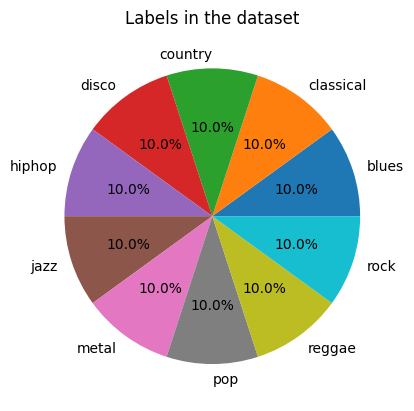

In [13]:
# plotting the graph based on the labels
value_counts = df['label'].value_counts()

# Extract the labels and counts from value_counts
labels = value_counts.index
counts = value_counts.values

# Create the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Labels in the dataset')

# Display the pie chart
plt.show()

We have a balanced Dataset

In [50]:
# Discription of the dataset
df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


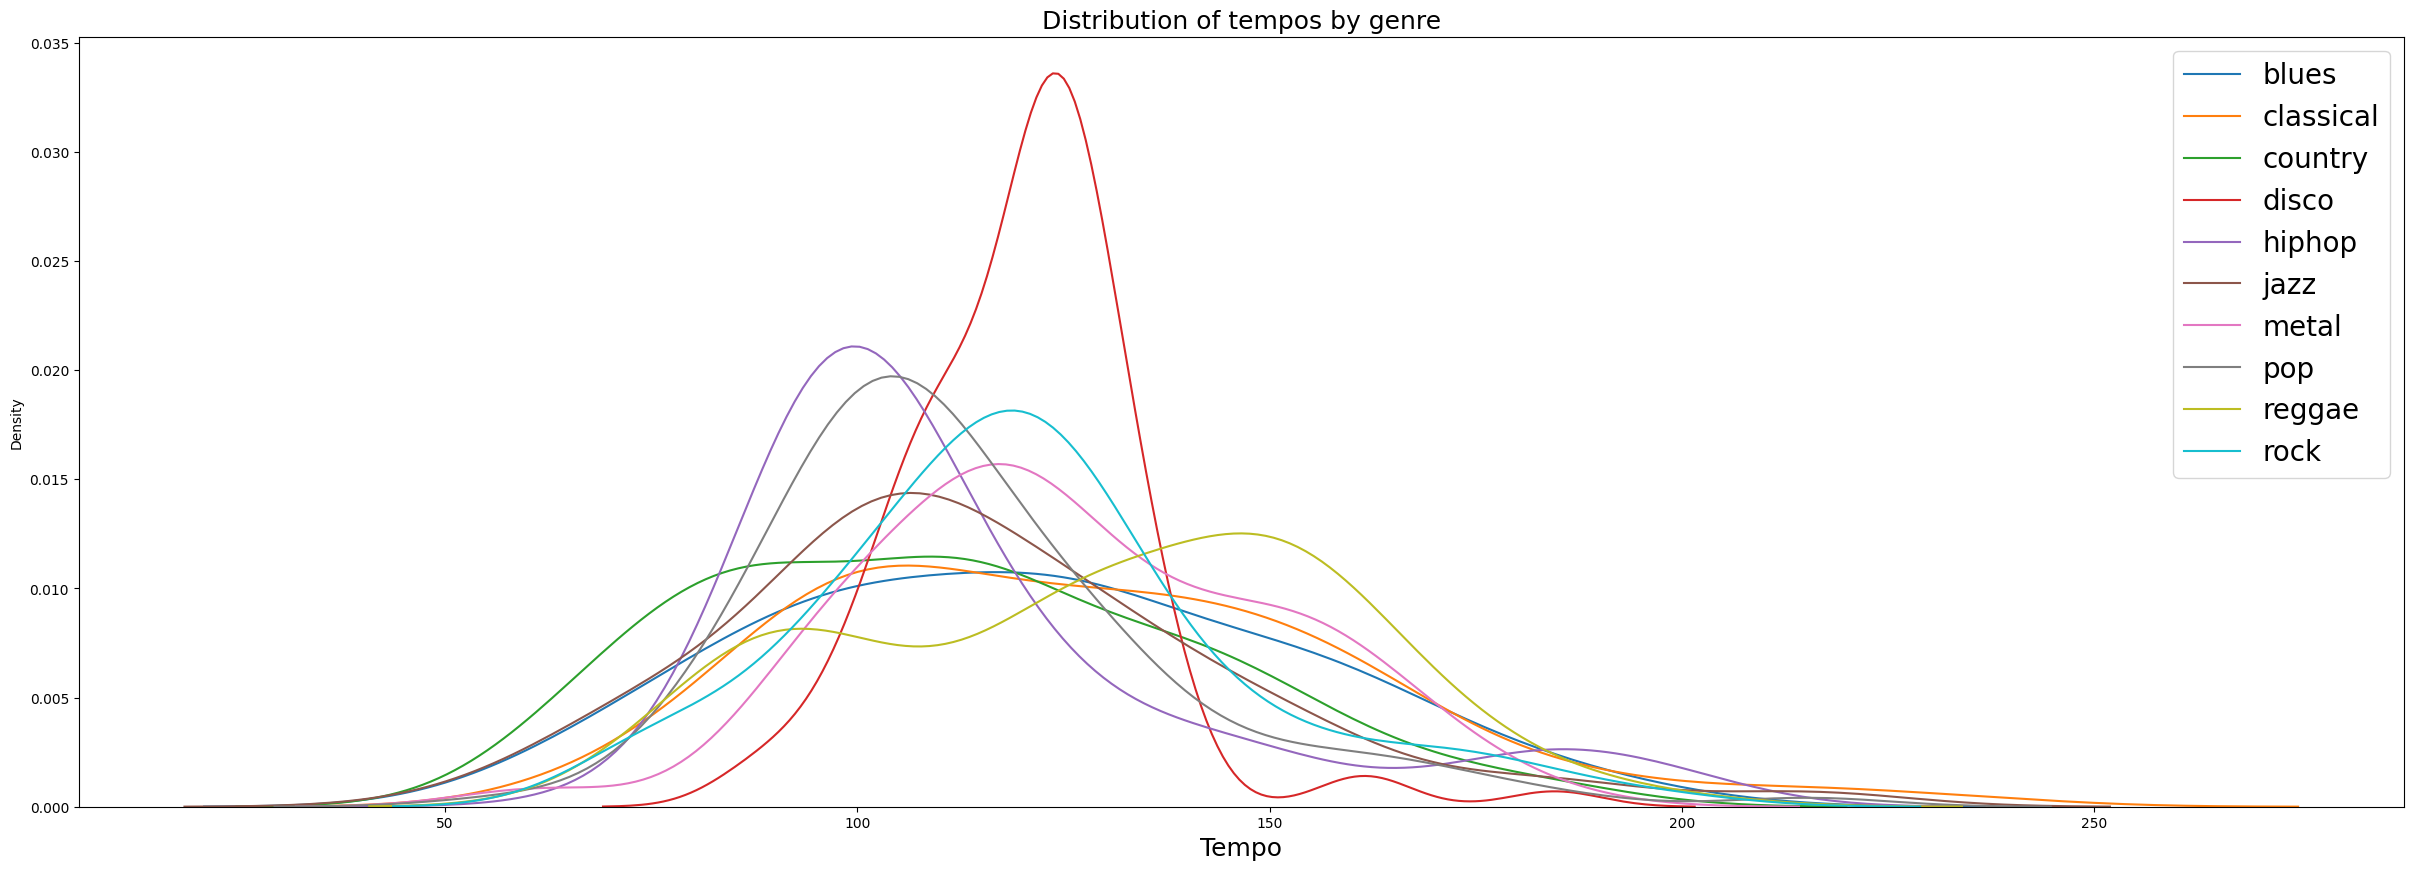

In [35]:
# Distribution of tempos by genre

# unique values in 'label' column
unique_lables = df['label'].unique()

plt.figure(figsize=(30, 10))

for i in unique_lables:
  sns.kdeplot(df[df['label']==str(i)]['tempo'], label=str(i))

plt.title("Distribution of tempos by genre", fontsize = 18)
plt.xlabel("Tempo", fontsize = 18)
plt.legend(fontsize=20);

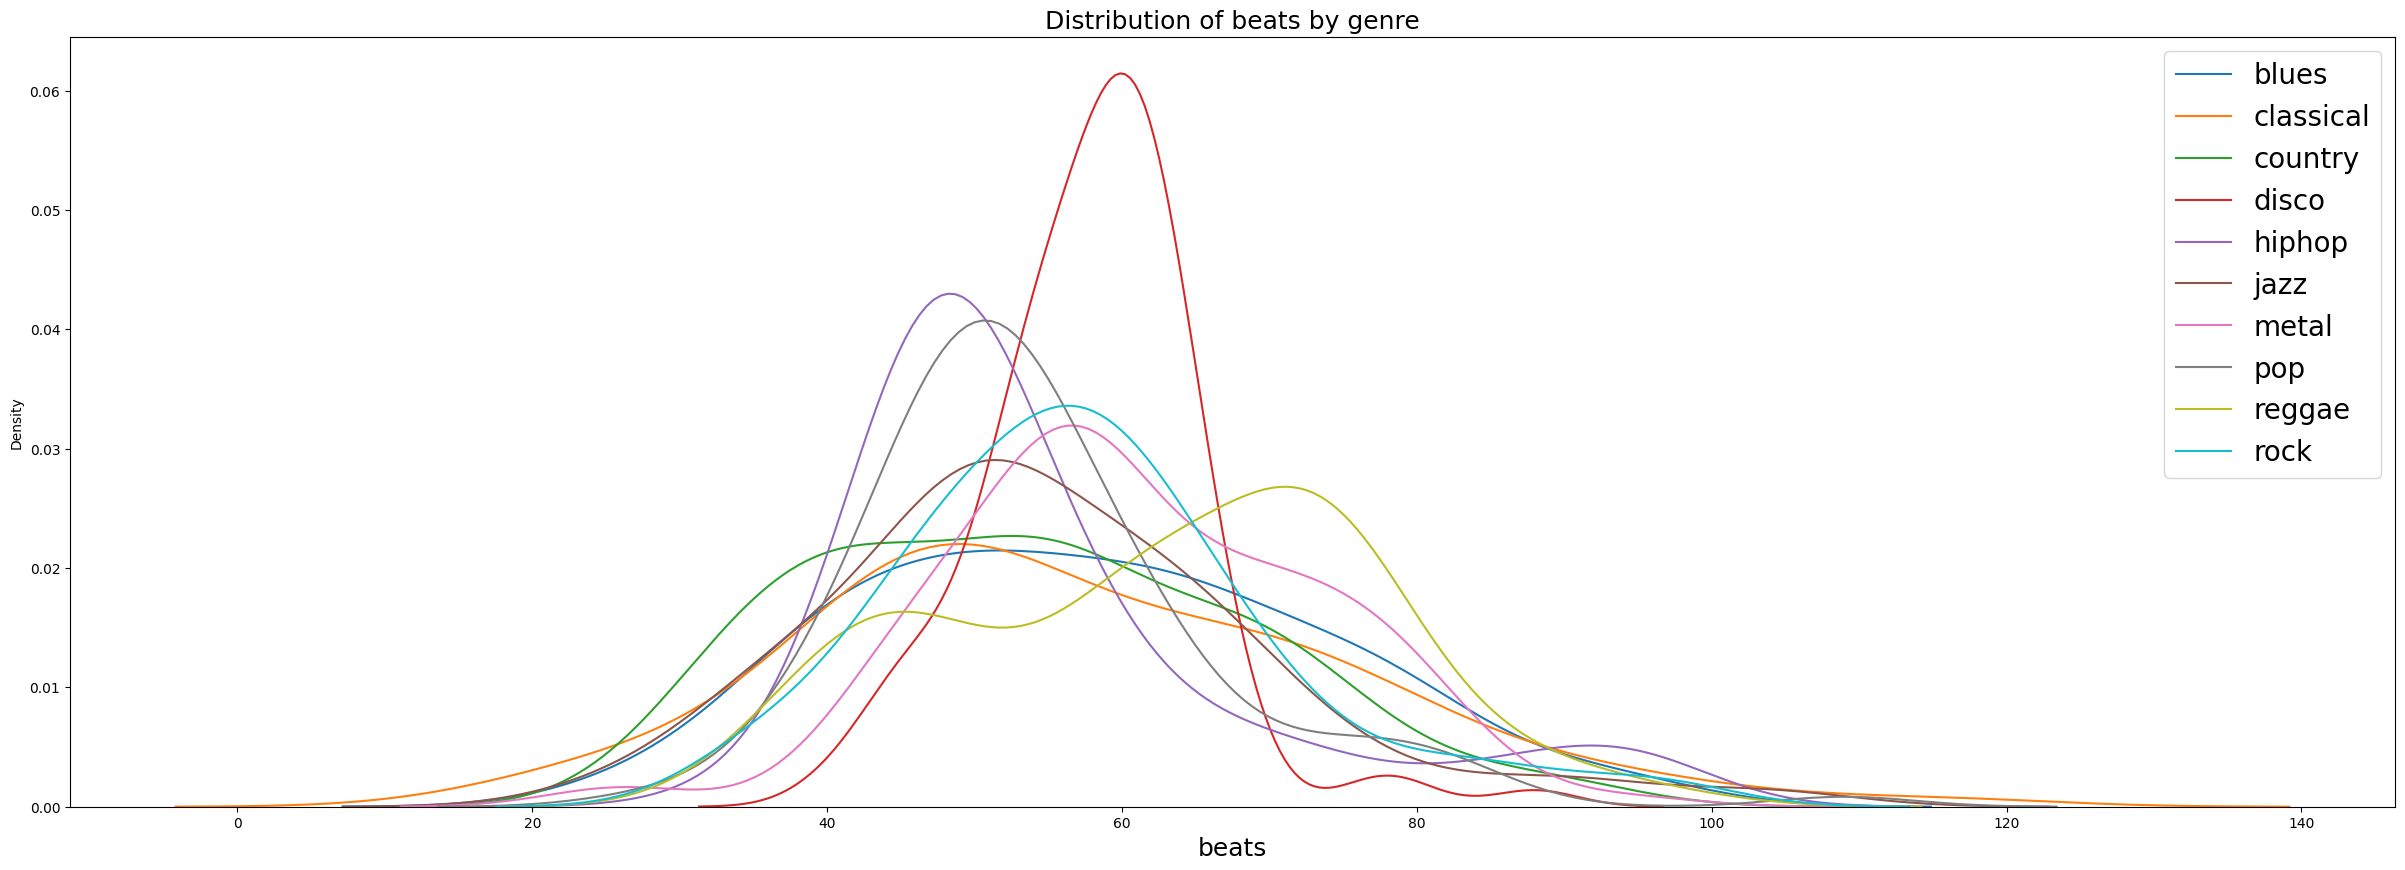

In [36]:
# Distribution of beats by genre
plt.figure(figsize=(30, 10))

for i in unique_lables:
  sns.kdeplot(df[df['label']==str(i)]['beats'], label=str(i))

plt.title("Distribution of beats by genre", fontsize = 18)
plt.xlabel("beats", fontsize = 18)
plt.legend(fontsize=20);

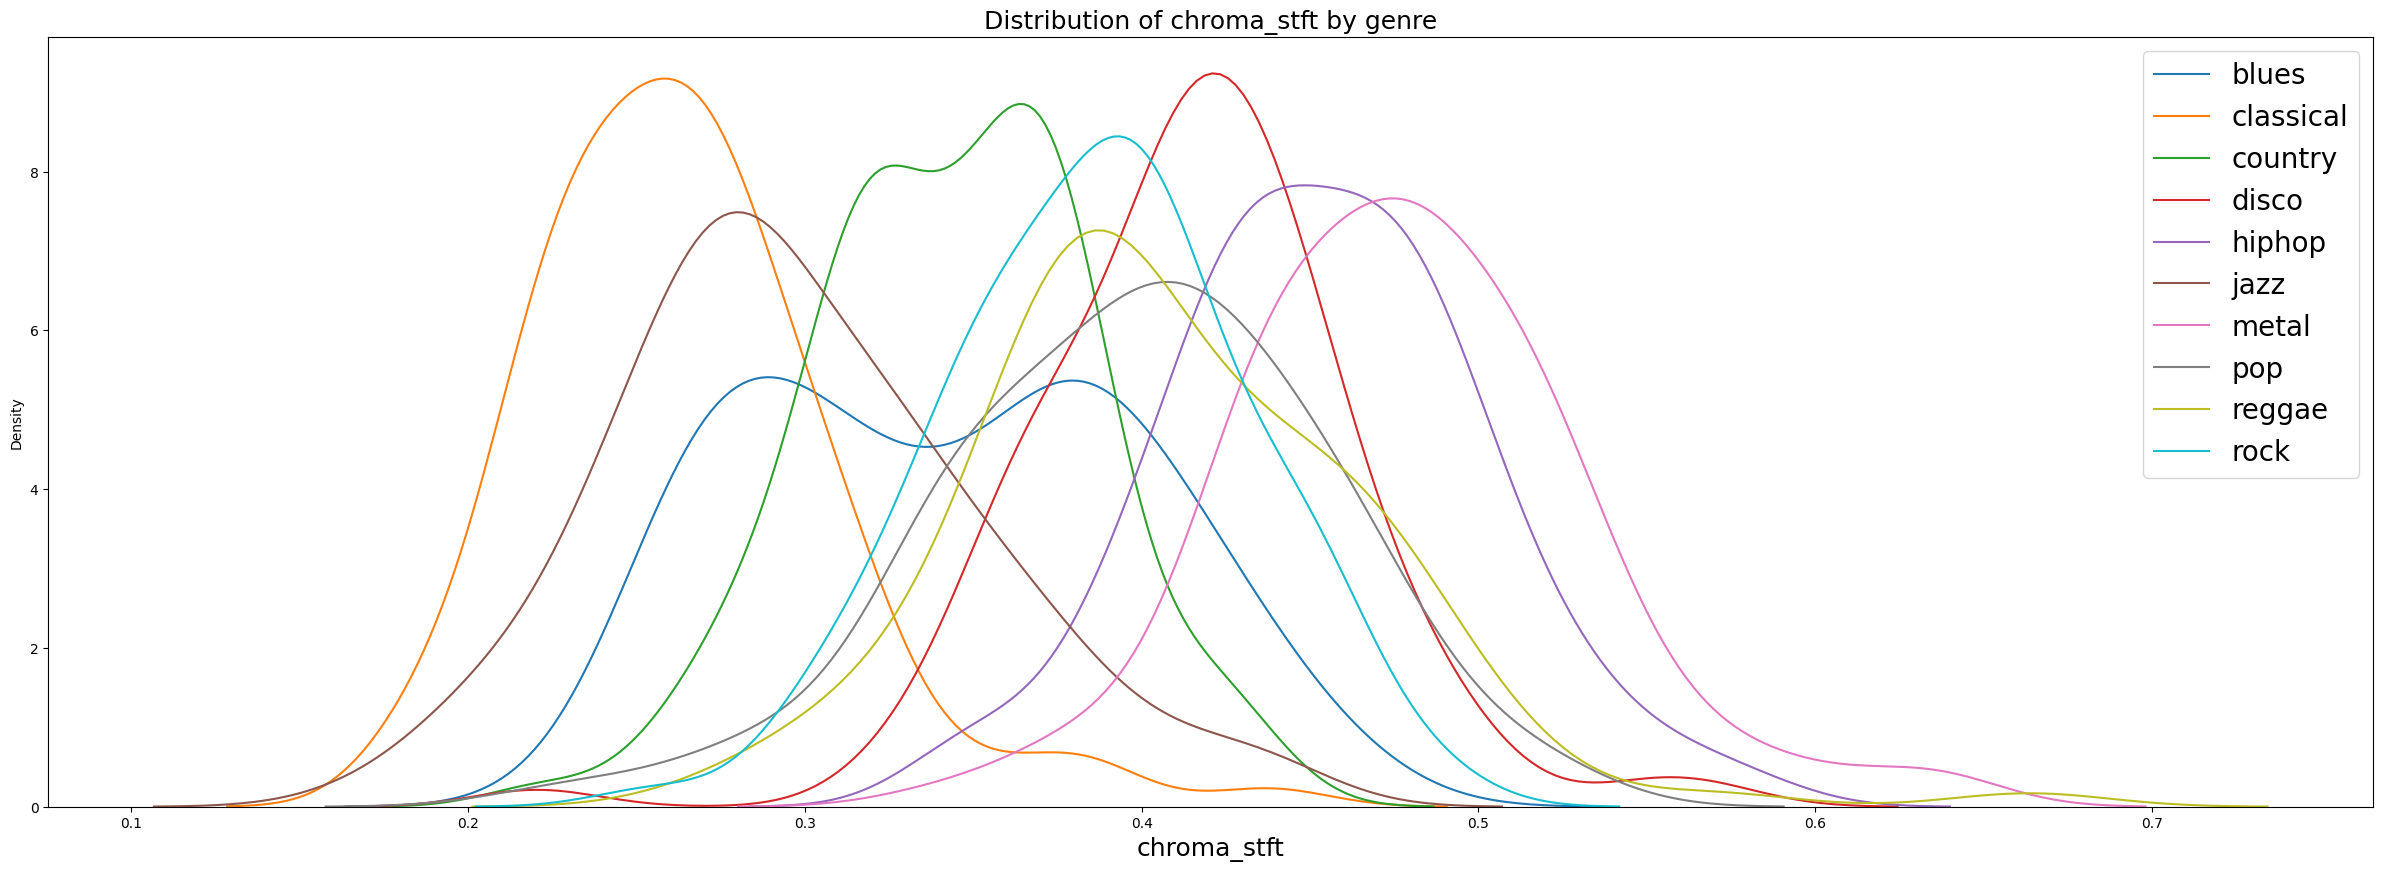

In [37]:
# Distribution of chroma_stft by genre
plt.figure(figsize=(30, 10))

for i in unique_lables:
  sns.kdeplot(df[df['label']==str(i)]['chroma_stft'], label=str(i))

plt.title("Distribution of chroma_stft by genre", fontsize = 18)
plt.xlabel("chroma_stft", fontsize = 18)
plt.legend(fontsize=20);

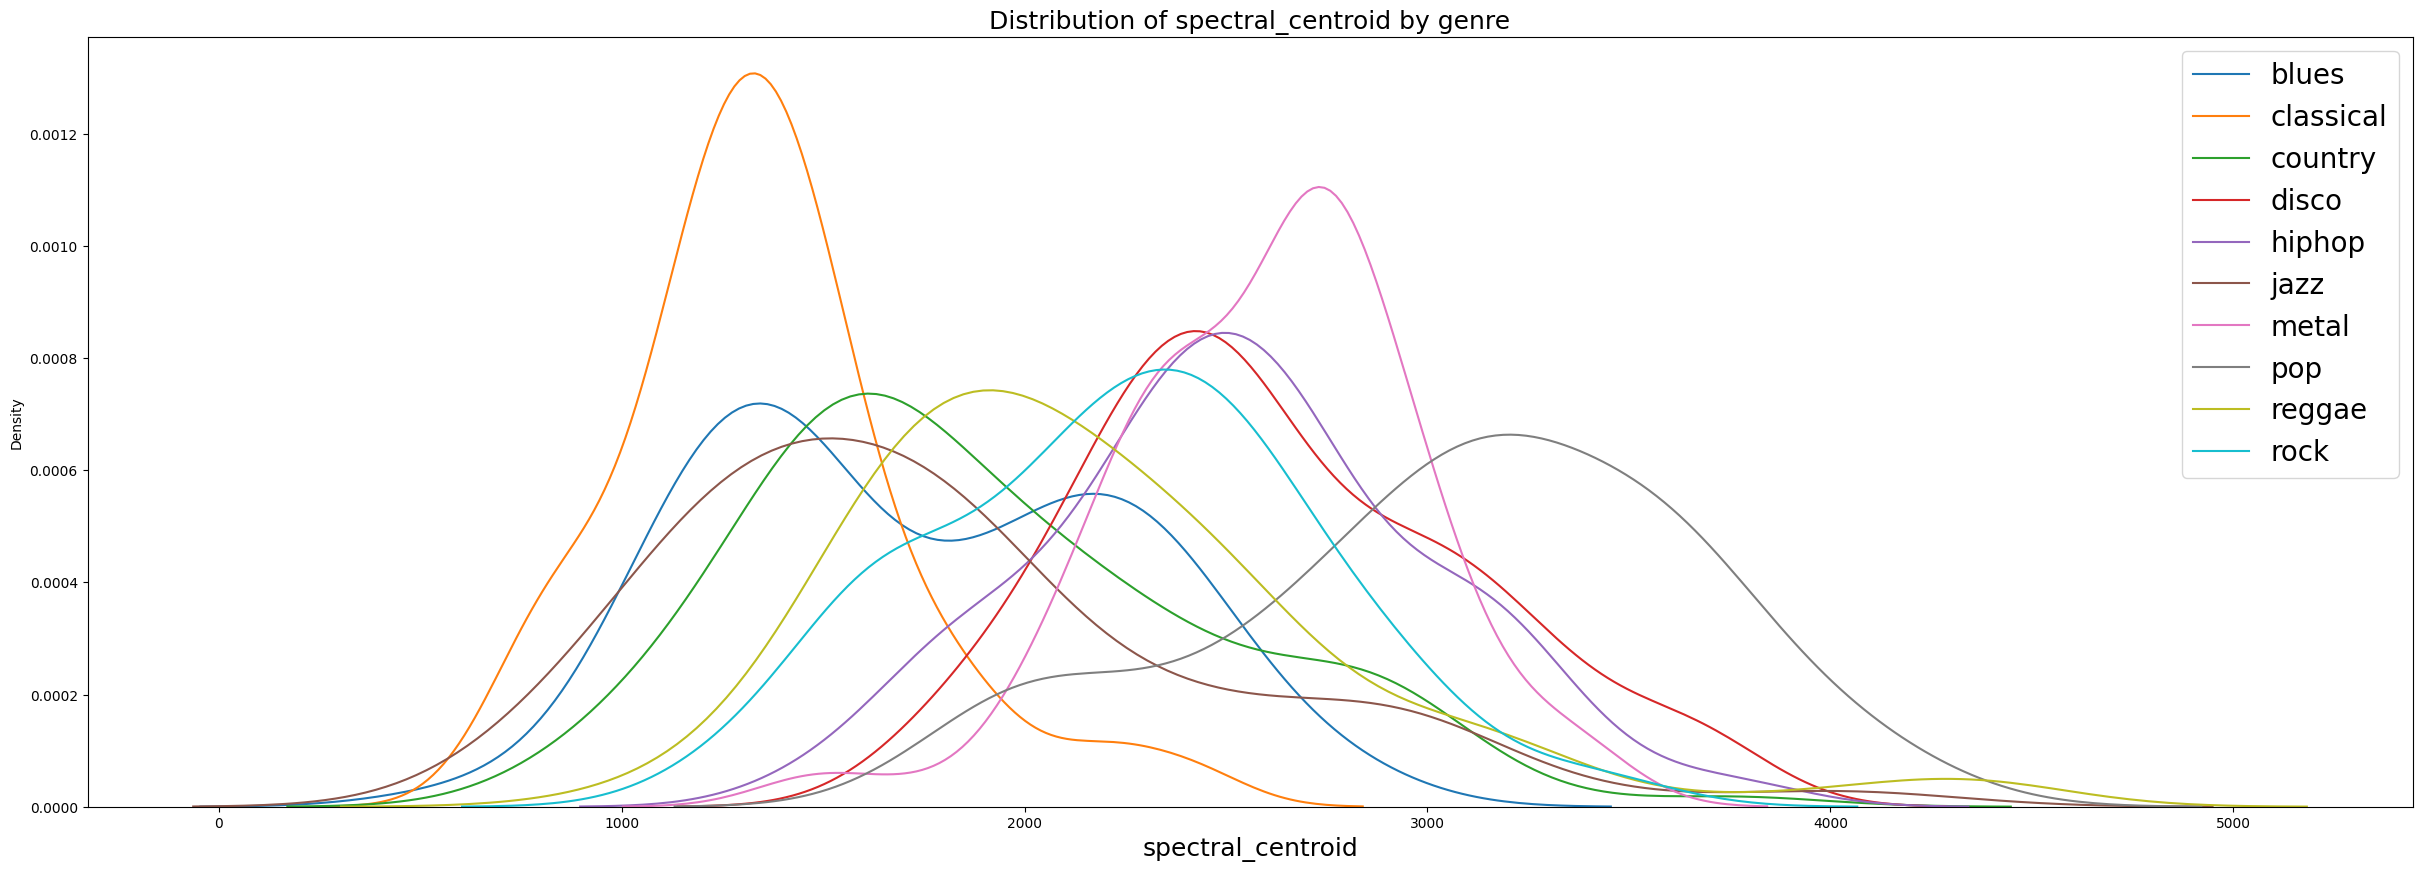

In [38]:
# Distribution of spectral_centroid by genre
plt.figure(figsize=(30, 10))

for i in unique_lables:
  sns.kdeplot(df[df['label']==str(i)]['spectral_centroid'], label=str(i))

plt.title("Distribution of spectral_centroid by genre", fontsize = 18)
plt.xlabel("spectral_centroid", fontsize = 18)
plt.legend(fontsize=20);

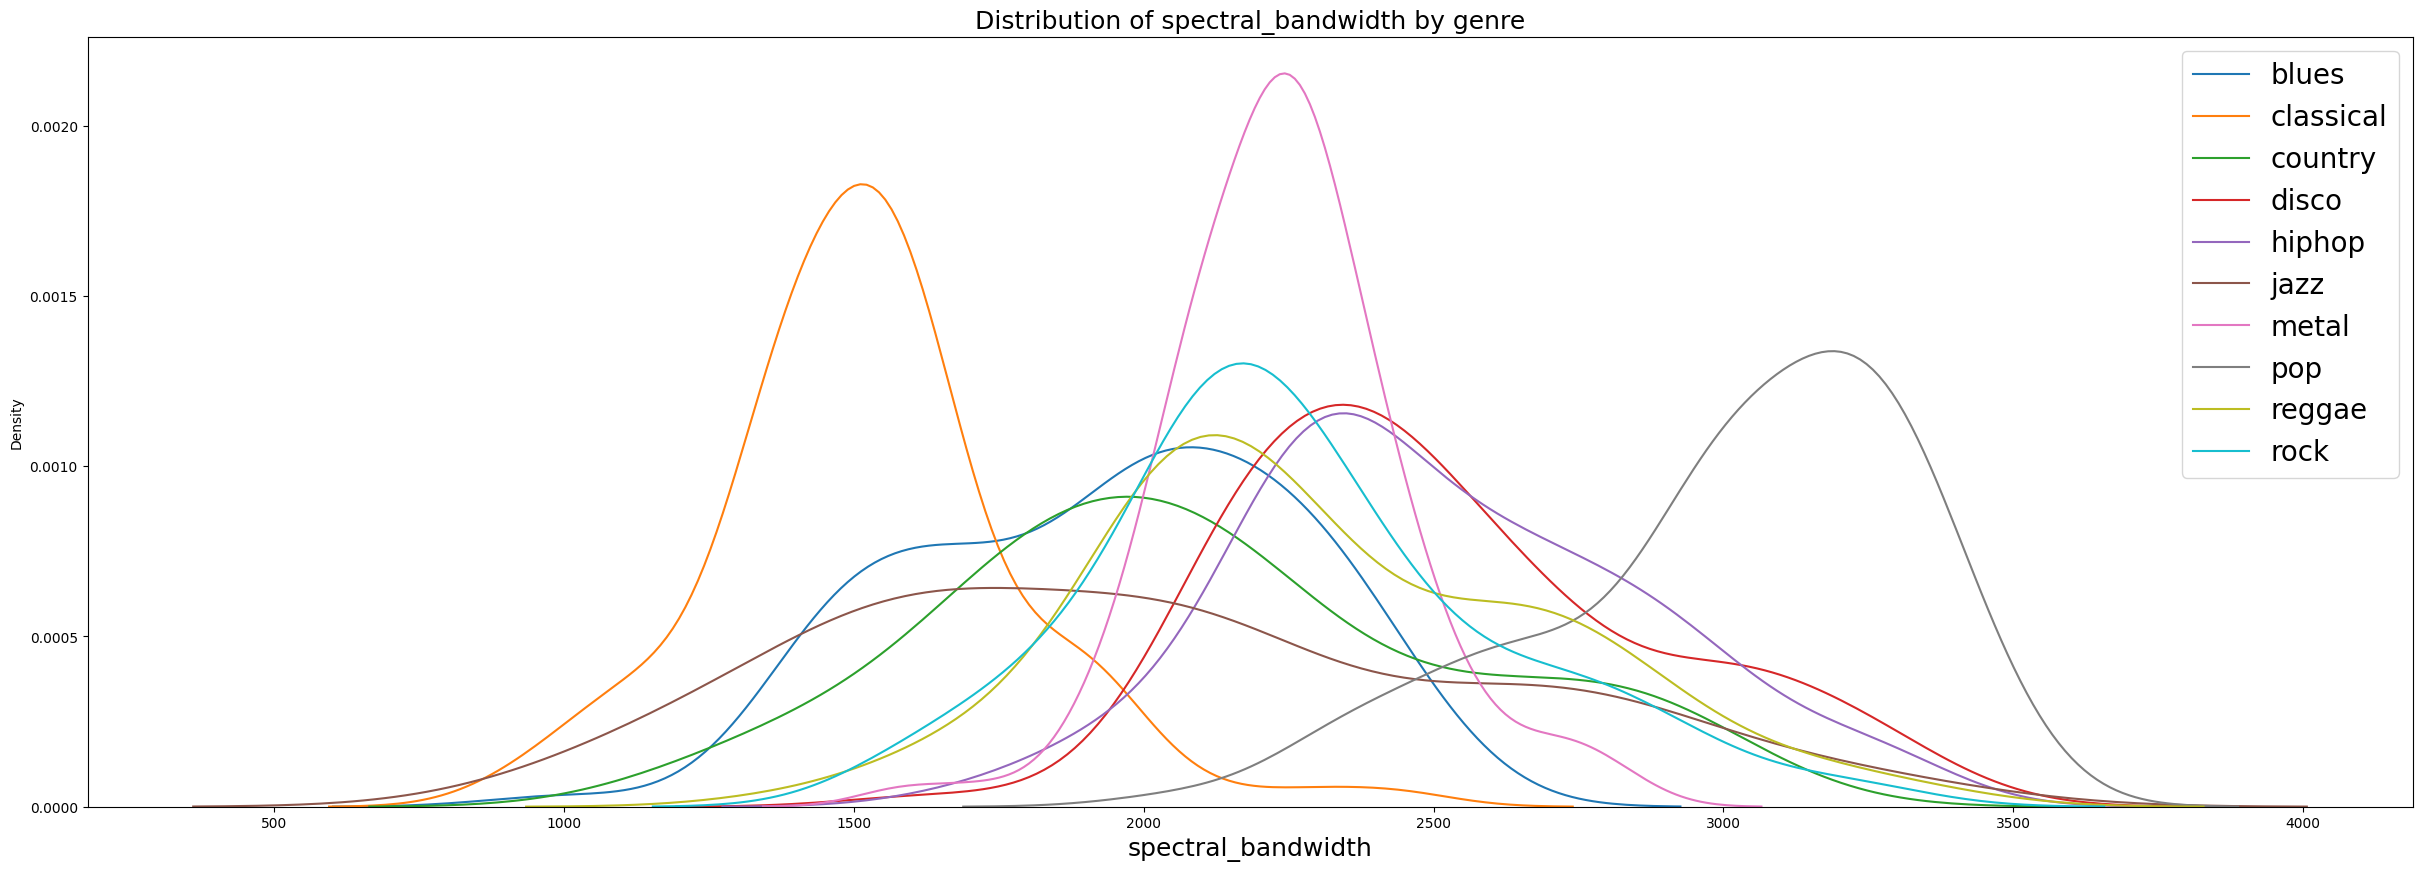

In [41]:
# Distribution of spectral_bandwidth by genre
plt.figure(figsize=(30, 10))

for i in unique_lables:
  sns.kdeplot(df[df['label']==str(i)]['spectral_bandwidth'], label=str(i))

plt.title("Distribution of spectral_bandwidth by genre", fontsize = 18)
plt.xlabel("spectral_bandwidth", fontsize = 18)
plt.legend(fontsize=20);

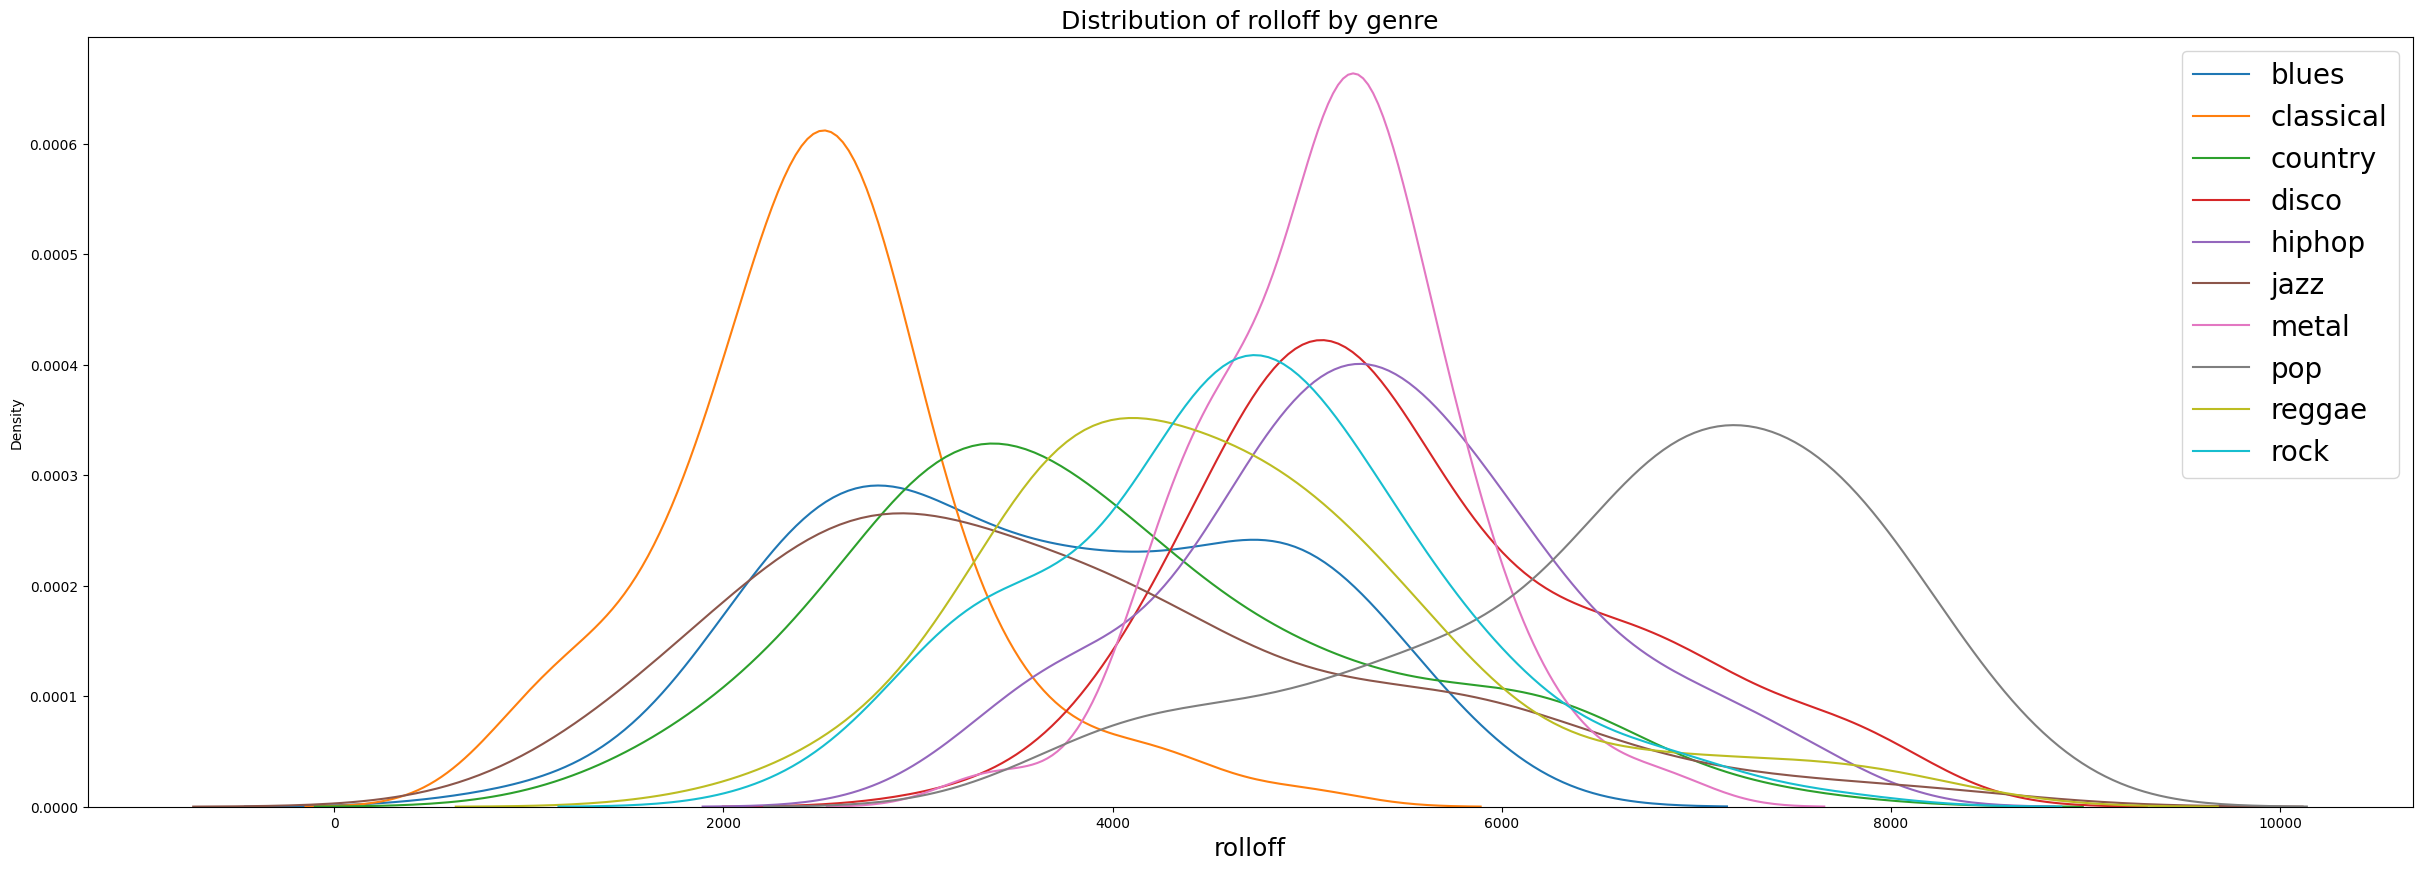

In [42]:
# Distribution of rolloff by genre
plt.figure(figsize=(30, 10))

for i in unique_lables:
  sns.kdeplot(df[df['label']==str(i)]['rolloff'], label=str(i))

plt.title("Distribution of rolloff by genre", fontsize = 18)
plt.xlabel("rolloff", fontsize = 18)
plt.legend(fontsize=20);

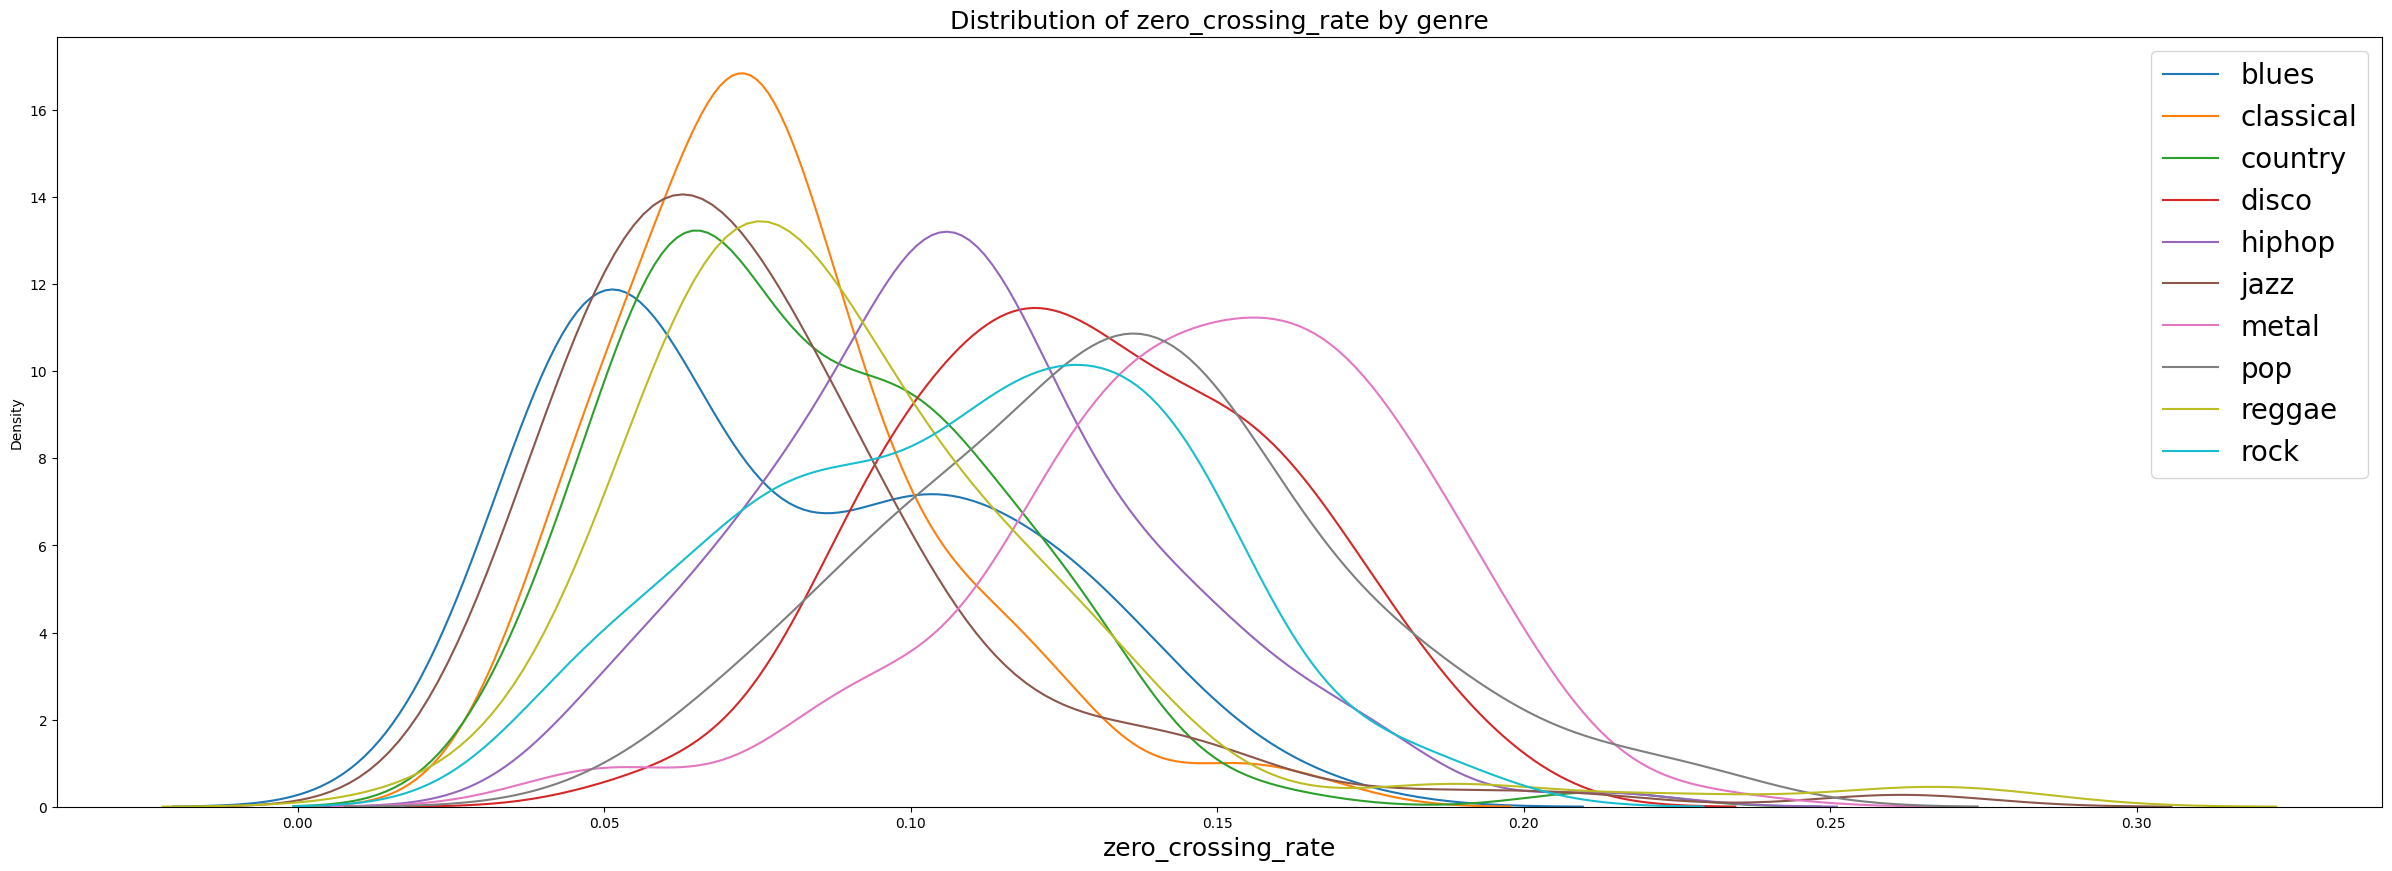

In [43]:
# Distribution of zero_crossing_rate by genre
plt.figure(figsize=(30, 10))

for i in unique_lables:
  sns.kdeplot(df[df['label']==str(i)]['zero_crossing_rate'], label=str(i))

plt.title("Distribution of zero_crossing_rate by genre", fontsize = 18)
plt.xlabel("zero_crossing_rate", fontsize = 18)
plt.legend(fontsize=20);

In [48]:
# unique value count per features 
unique_count = {str(i):df[str(i)].nunique() for i in df.columns}

# sorting the dictionary
unique_count_sorted = dict(sorted(unique_count.items(), key=lambda x: x[1]))
unique_count_sorted

{'label': 10,
 'tempo': 35,
 'beats': 81,
 'zero_crossing_rate': 985,
 'chroma_stft': 986,
 'rmse': 986,
 'spectral_centroid': 986,
 'spectral_bandwidth': 986,
 'rolloff': 986,
 'mfcc1': 986,
 'mfcc2': 986,
 'mfcc3': 986,
 'mfcc4': 986,
 'mfcc5': 986,
 'mfcc6': 986,
 'mfcc7': 986,
 'mfcc8': 986,
 'mfcc9': 986,
 'mfcc10': 986,
 'mfcc11': 986,
 'mfcc12': 986,
 'mfcc13': 986,
 'mfcc14': 986,
 'mfcc15': 986,
 'mfcc16': 986,
 'mfcc17': 986,
 'mfcc18': 986,
 'mfcc19': 986,
 'mfcc20': 986,
 'filename': 1000}

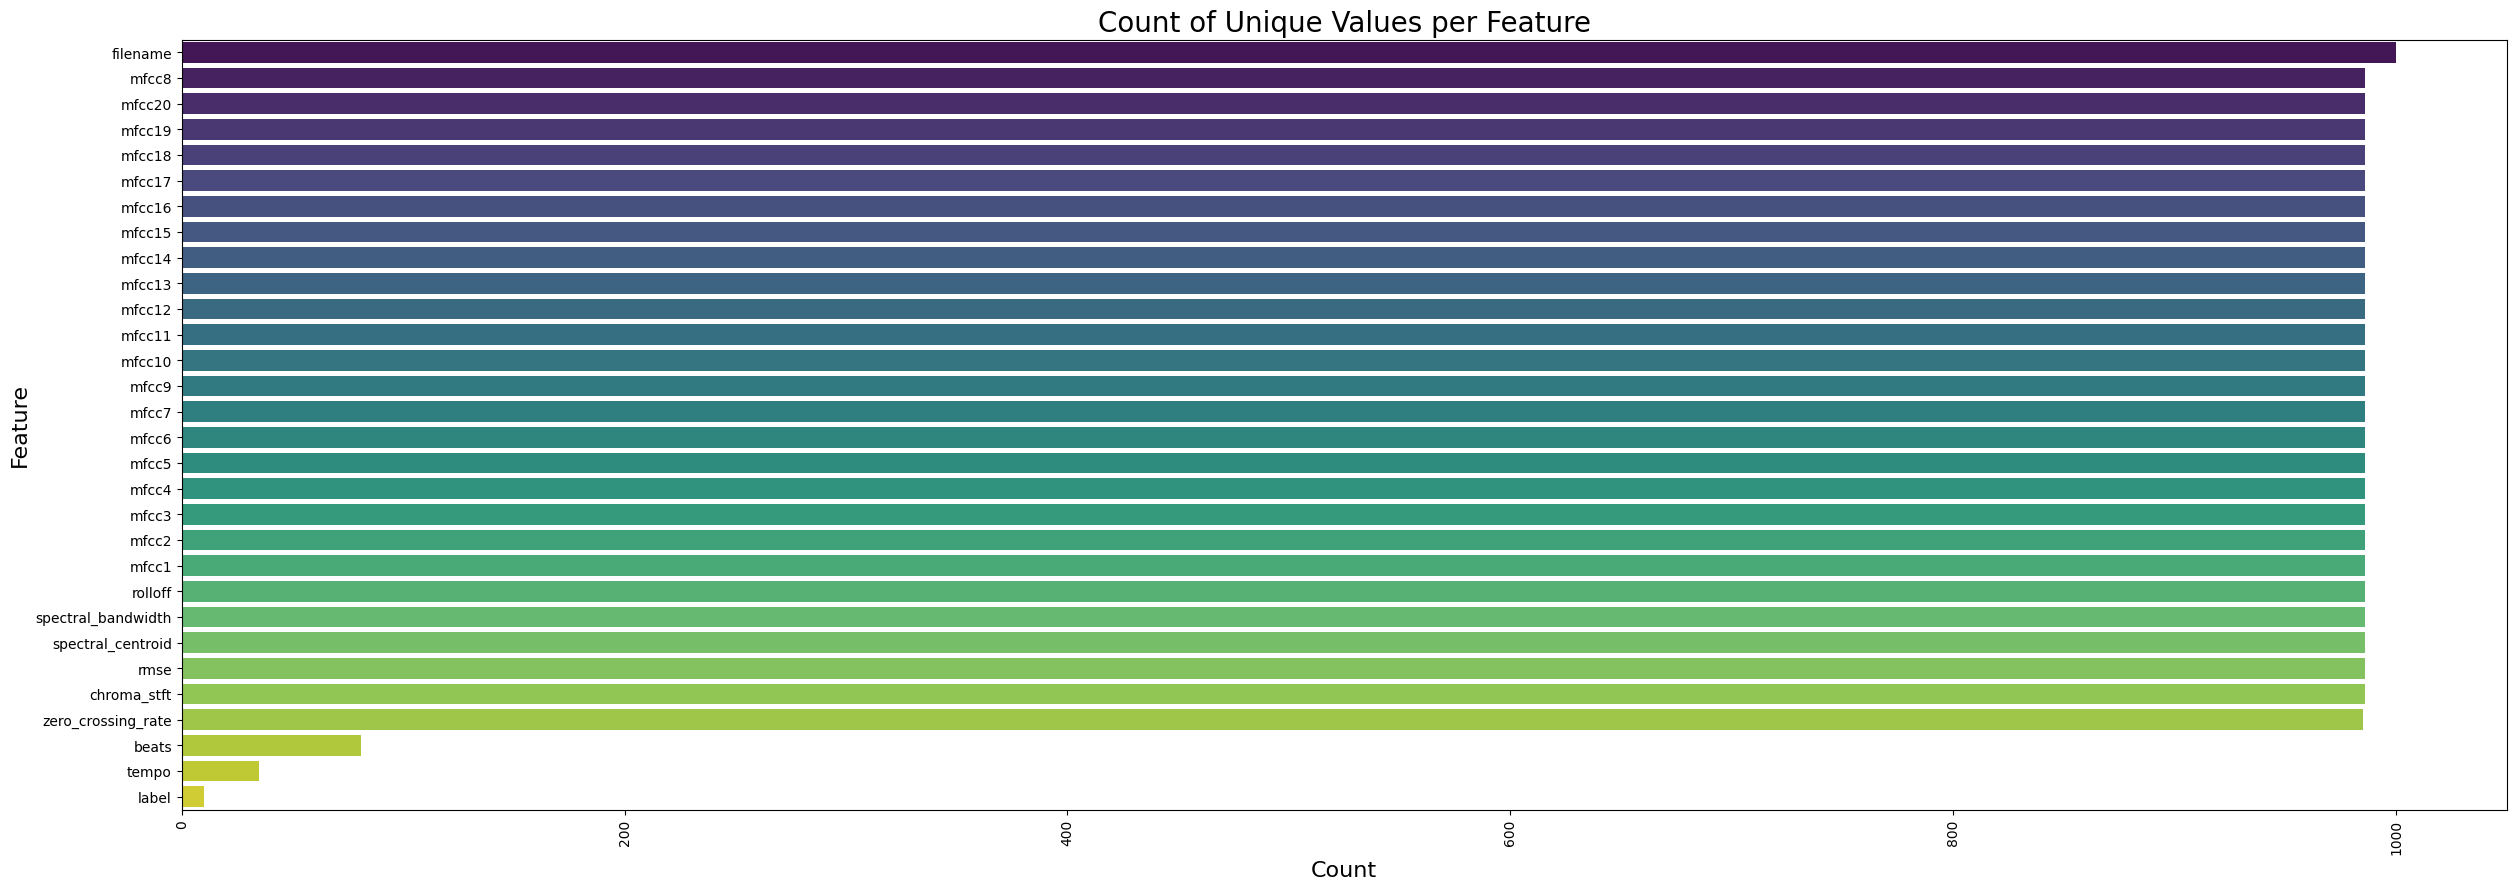

In [53]:
# Create a countplot
plt.figure(figsize=(30, 10))  # Set the figure size (optional)

# Convert the dictionary to a pandas DataFrame
data = pd.DataFrame({'Feature': list(unique_count.keys()), 'Count': list(unique_count.values())})

# Sort the DataFrame by the count values in descending order
data_sorted = data.sort_values('Count', ascending=False)

# Plot the countplot
sns.barplot(x='Count', y='Feature', data=data_sorted, palette='viridis')

# Set the labels and title
plt.xlabel('Count', fontsize=16)
plt.ylabel('Feature', fontsize=16)
plt.title('Count of Unique Values per Feature', fontsize=20)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

In [57]:
# splitting the input features and target feature
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

In [59]:
# removing the 'filename' feature from the input feature
X.drop(columns=['filename'], axis=1, inplace=True)

## Applying k-means clustering algorithm

In [61]:
# model Building 
from sklearn.cluster import KMeans 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters = 5 The average silhouette_score is : 0.4589073526363415
For n_clusters = 10 The average silhouette_score is : 0.38725928898921846
For n_clusters = 15 The average silhouette_score is : 0.33364630114431


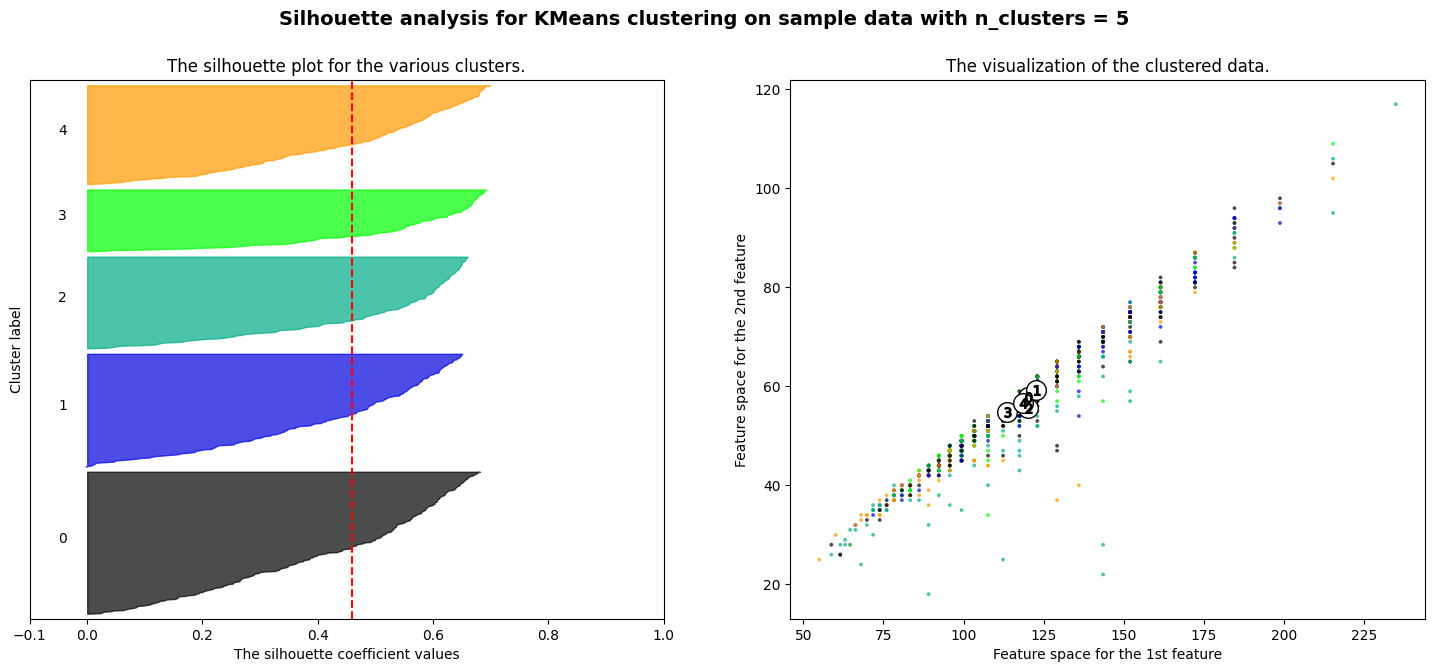

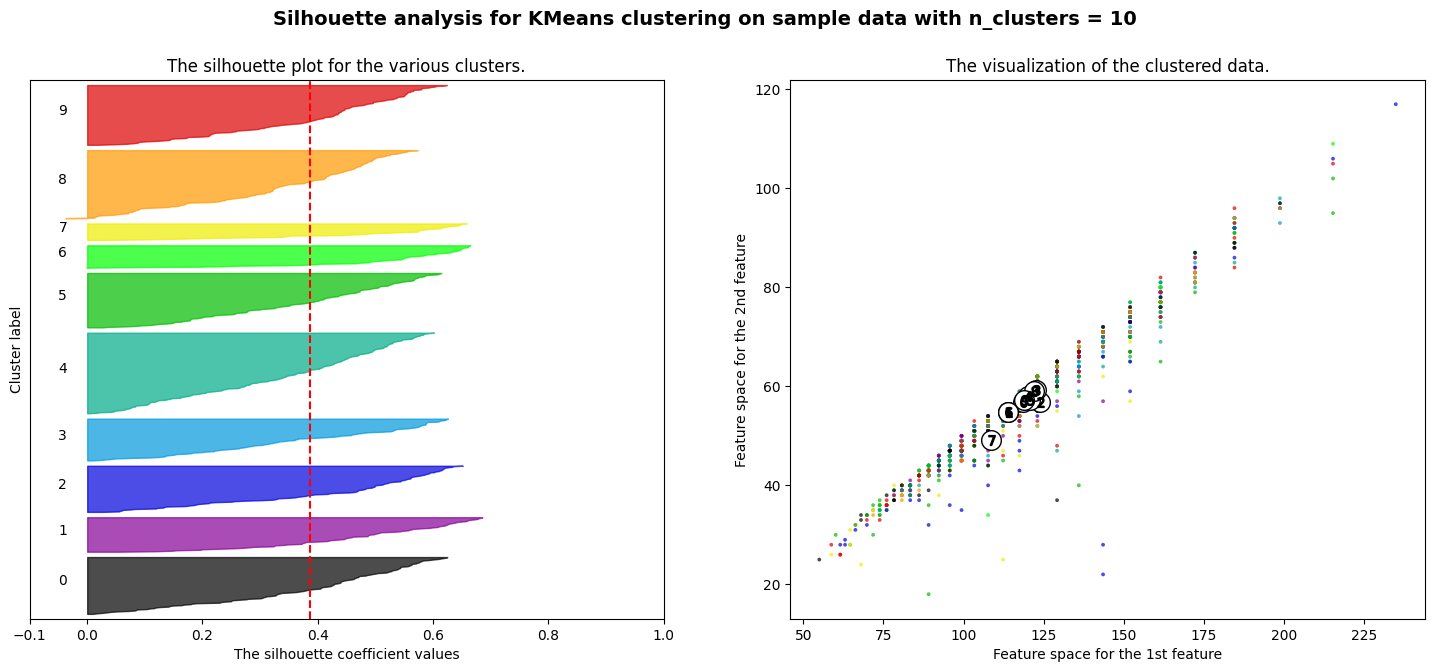

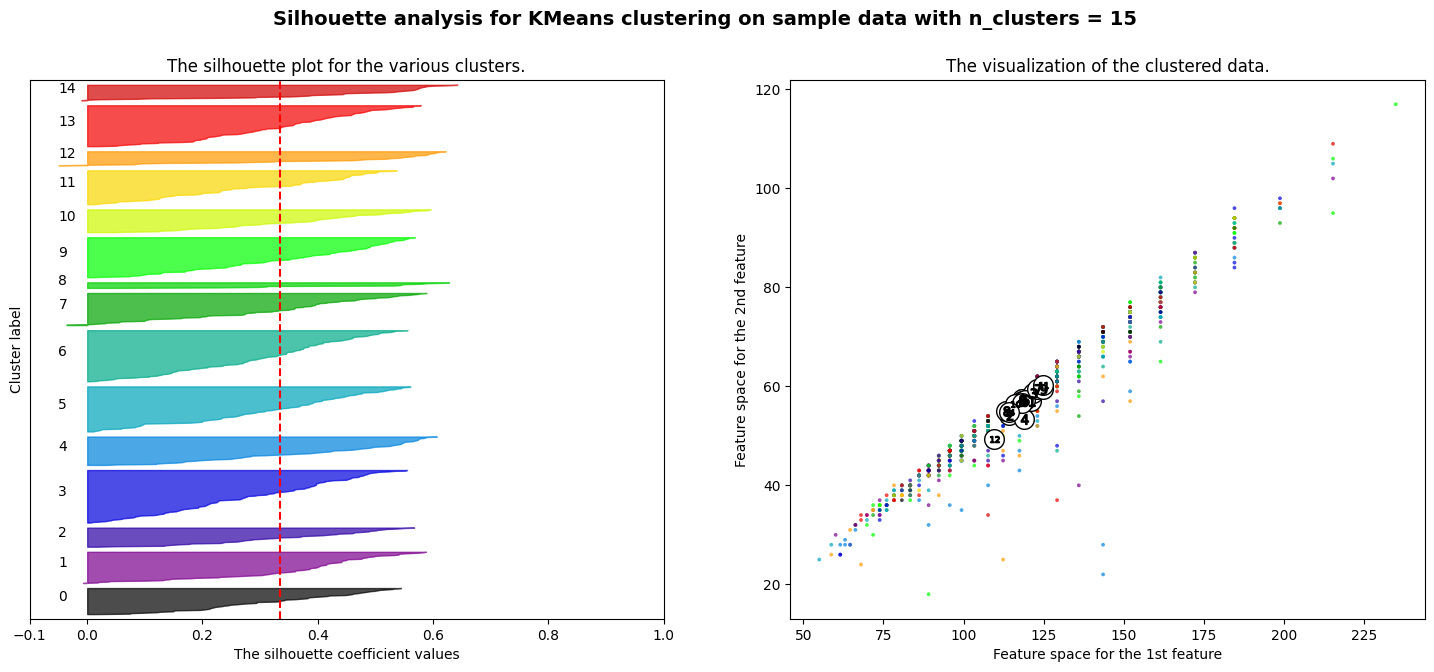

In [62]:
range_n_clusters = [5, 10, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=100, init='k-means++')
    clusterer.fit_predict(X)
    cluster_labels = clusterer.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Scaling the Dataset

In [65]:
# scaling the input features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

For n_clusters = 5 The average silhouette_score is : 0.19629310514526138
For n_clusters = 10 The average silhouette_score is : 0.11664256421879622
For n_clusters = 15 The average silhouette_score is : 0.1064231887881139


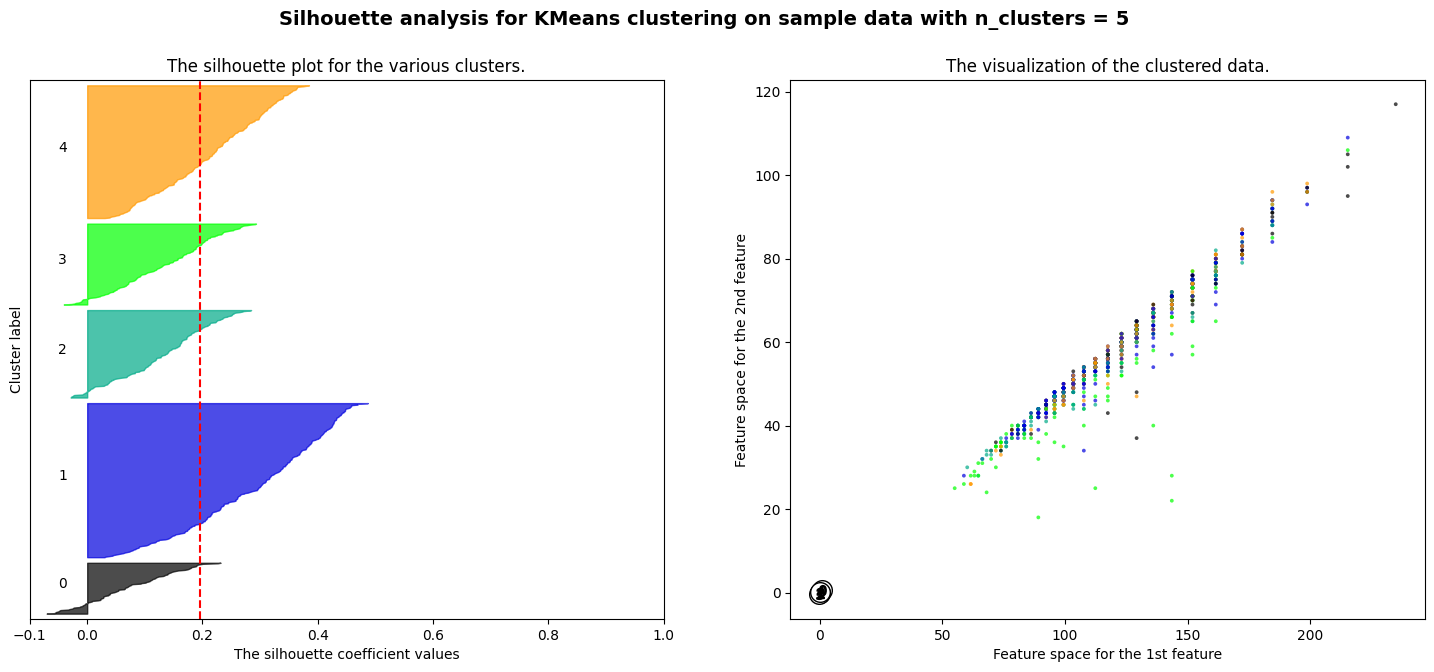

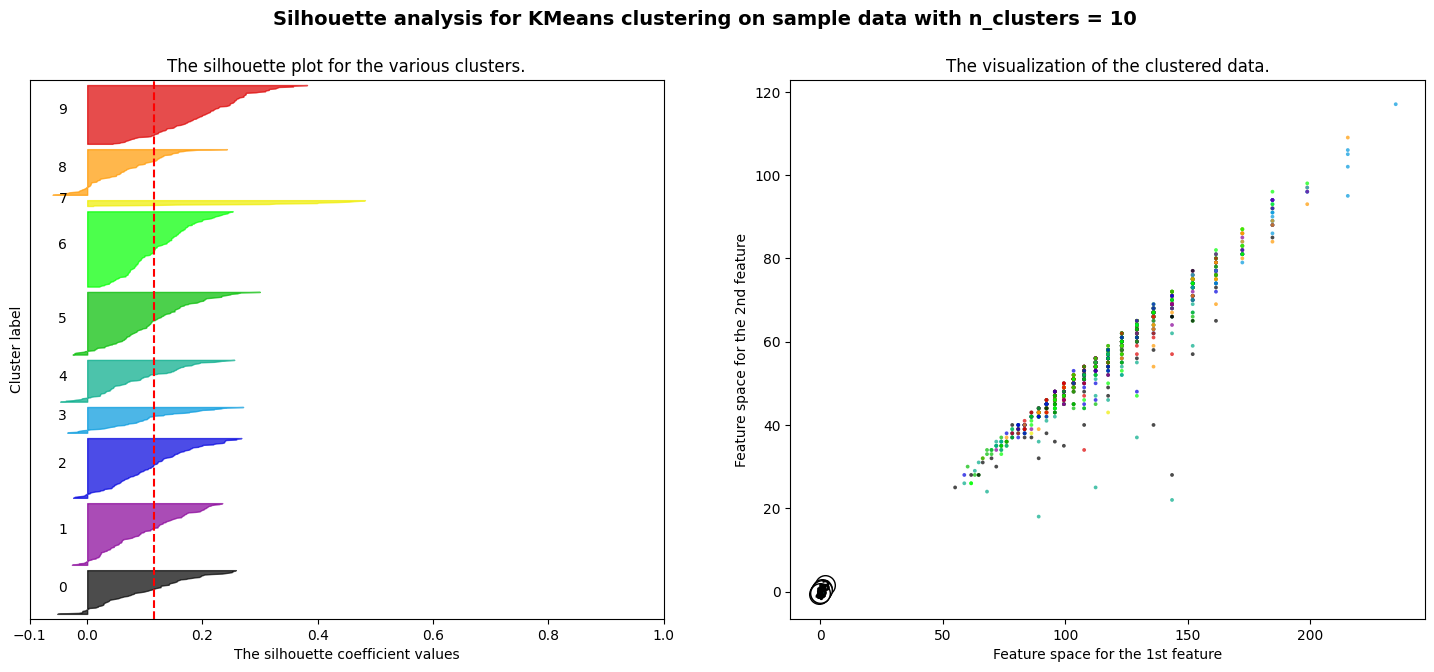

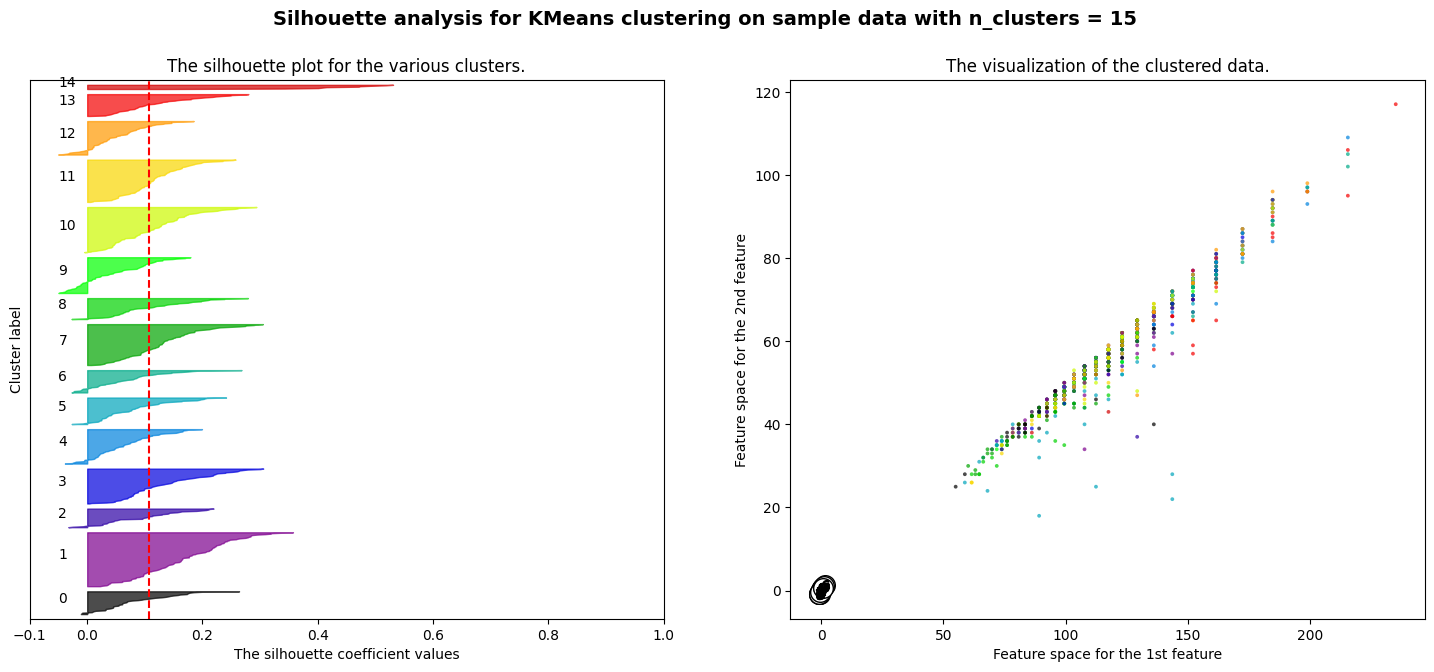

In [66]:
range_n_clusters = [5, 10, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=100, init='k-means++')
    clusterer.fit_predict(X_scaled)
    cluster_labels = clusterer.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Reducing the dimensions, Applying PCA

In [68]:
# reducing the dimensions with PCA
from sklearn.decomposition import PCA

# Applying PCA on data
pca = PCA(n_components=None)

pca.fit_transform(X_scaled)

array([[ 4.02695353e+00, -6.08236678e-01,  5.66733454e-01, ...,
        -4.59896692e-02,  1.32010611e-01, -4.65423099e-02],
       [-2.28869713e+00, -2.08399959e+00, -2.34075216e+00, ...,
         8.21292509e-02, -2.68260241e-02, -3.81483742e-02],
       [-3.04840225e-01, -4.84880945e+00,  5.83597620e+00, ...,
        -1.79736646e-01,  1.29086627e-01, -1.76187225e-02],
       ...,
       [ 1.27022664e+00, -2.04662013e+00, -1.69743139e-01, ...,
         2.43174611e-01,  9.02752816e-02,  5.67858739e-02],
       [ 9.08851515e-01, -2.62153665e+00,  1.16770661e+00, ...,
         4.71636915e-01,  1.82631025e-03,  4.47377272e-02],
       [ 1.53084291e+00, -1.97474856e+00,  1.12097212e+00, ...,
        -8.25302903e-02,  3.24238338e-02,  4.52260469e-03]])

In [69]:
np.cumsum(pca.explained_variance_ratio_)

array([0.30015603, 0.53750559, 0.63469562, 0.70423322, 0.75974771,
       0.79333512, 0.82511352, 0.85138007, 0.87070608, 0.88704017,
       0.90101001, 0.91326135, 0.92475646, 0.93468785, 0.9433808 ,
       0.9519604 , 0.95987186, 0.96738842, 0.97405892, 0.9801426 ,
       0.9857266 , 0.99056001, 0.99446222, 0.99721591, 0.99850606,
       0.99953846, 0.99989678, 1.        ])

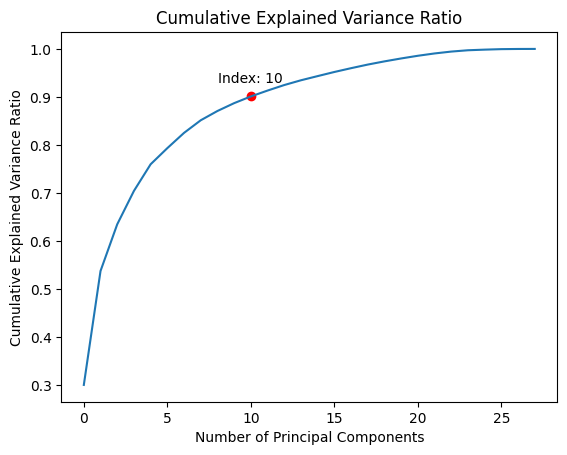

In [71]:
import numpy as np
import matplotlib.pyplot as plt

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
index_value = np.argmax(explained_variance_ratio >= 0.90)  # Get the index when value touches 0.90

plt.plot(explained_variance_ratio)

# Highlight the point when the value touches 0.90
plt.scatter(index_value, explained_variance_ratio[index_value], color='red')
plt.annotate(f'Index: {index_value}', (index_value, explained_variance_ratio[index_value]), 
             textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')

plt.show()


In [72]:
# Applying PCA on data
pca = PCA(n_components=10)

X_transformed = pca.fit_transform(X_scaled)

For n_clusters = 5 The average silhouette_score is : 0.2289356372676697
For n_clusters = 10 The average silhouette_score is : 0.15048293267781912
For n_clusters = 15 The average silhouette_score is : 0.13644527945542098


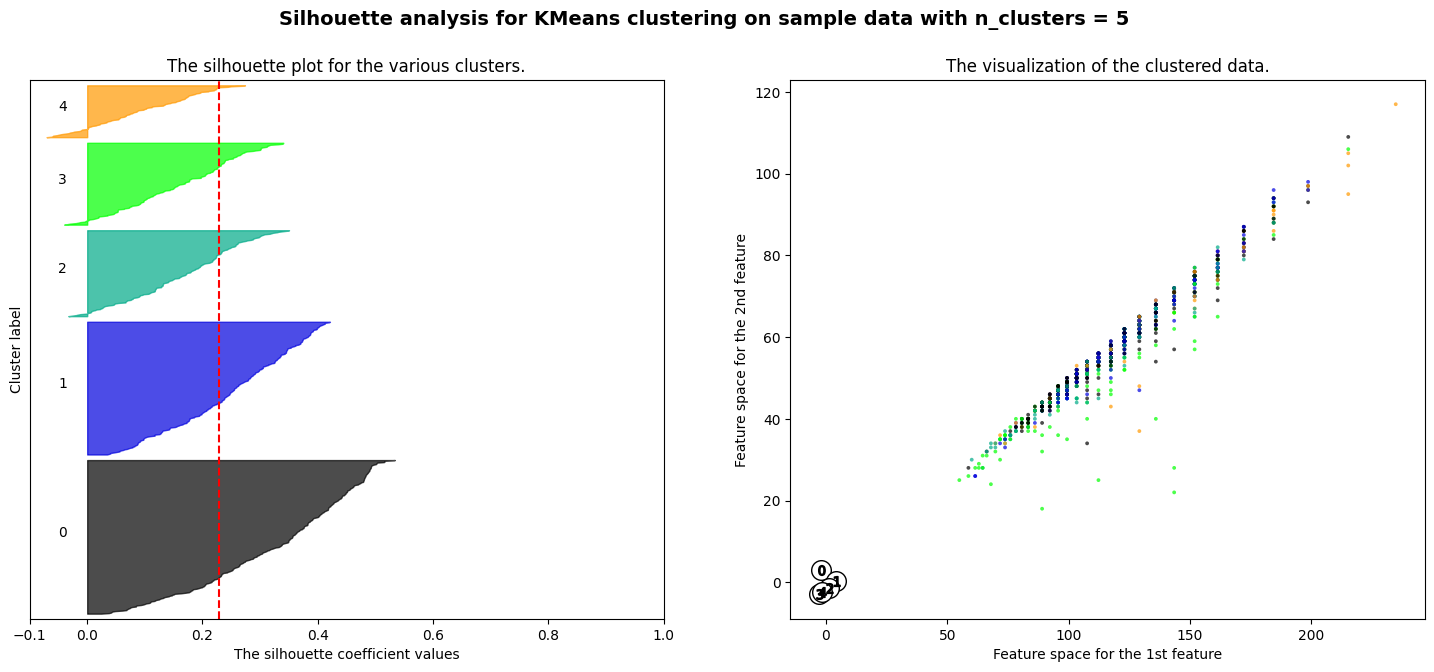

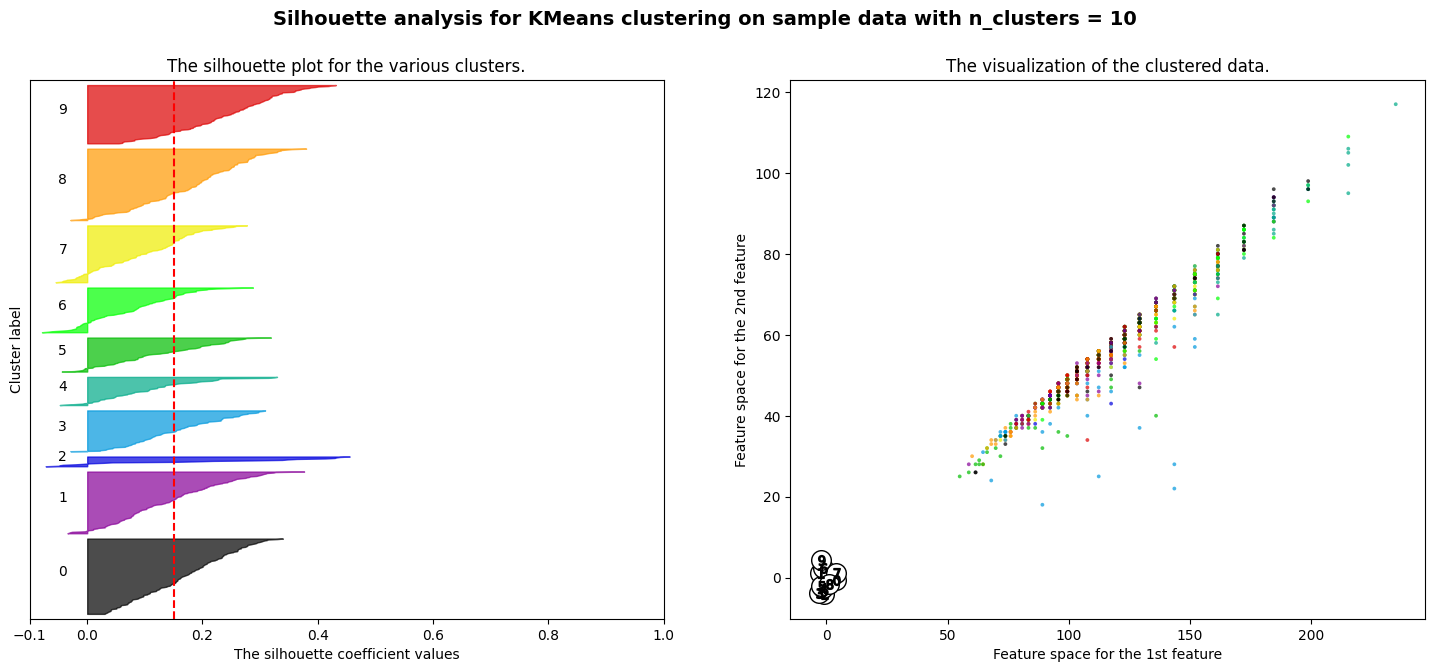

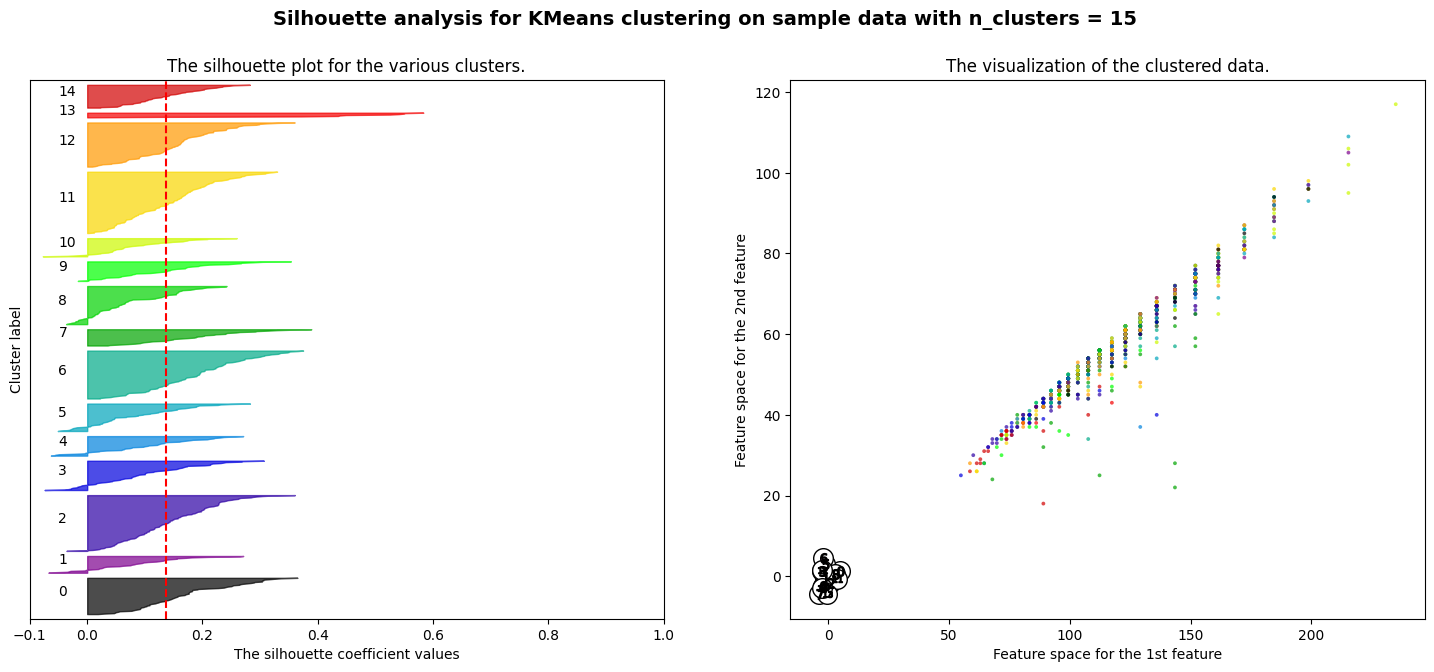

In [74]:
range_n_clusters = [5, 10, 15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_transformed) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=100, init='k-means++')
    clusterer.fit_predict(X_transformed)
    cluster_labels = clusterer.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_transformed, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### After comparing the experiments, we found that the dataset achieved the highest accuracy when we did not apply scaling and dimension reduction techniques.

## Final Model

In [86]:
# Splitting the dataset for testing 
from sklearn.model_selection import train_test_split

train_size = 0.9  # Define the proportion of the data for training

# Split the dataframe into train and test sets
train_df, test_df = train_test_split(df, train_size=train_size, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Train set shape: (900, 30)
Test set shape: (100, 30)


In [87]:
# dropping the extra columns
train_df.drop(columns=['filename', 'label'], axis=1, inplace=True)
train_df.head(2)

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
716,95.703125,47,0.426655,0.097938,4225.662023,3404.260172,8483.157037,0.228737,-113.141215,41.587729,...,0.616376,1.256652,2.896106,-0.767989,0.222327,-1.407112,-0.760795,-0.870709,-1.539565,1.068273
351,123.046875,60,0.414734,0.215964,2361.555072,2806.500849,5437.617119,0.090189,-46.815604,103.730083,...,-0.866834,-5.270495,-1.751223,-3.650547,-4.321269,-0.091273,-2.502904,0.540019,2.519455,-3.541227


In [88]:
kmeans = KMeans(n_clusters=10, random_state=10, n_init=100, init='k-means++')
kmeans.fit(train_df)

KMeans(n_clusters=10, n_init=100, random_state=10)

In [89]:
# saving the trained model 
import pickle

# Save the k-means model to a pickle file
with open('kmeans_model.pickle', 'wb') as file:
    pickle.dump(kmeans, file)


In [145]:
# picking random sample from test_df for testing

def label_sample(label_name:str):
  temp_df = test_df[test_df['label']==str(label_name)].sample(n=1)
  temp_df.drop(columns=['label'], axis=1, inplace=True)
  return temp_df

In [140]:
# exporting the test_df for further testing 
test_df.to_csv('test_data.csv', index=False)

In [146]:
sample_df = label_sample('jazz')

In [147]:
sample_df

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
570,86.132812,37,0.224017,0.021197,1176.101286,1753.457468,2343.452496,0.039911,-413.601087,118.258973,...,-6.27787,-3.61197,-5.268531,1.125525,2.824699,6.590382,7.955249,5.068792,1.615771,-4.366499
